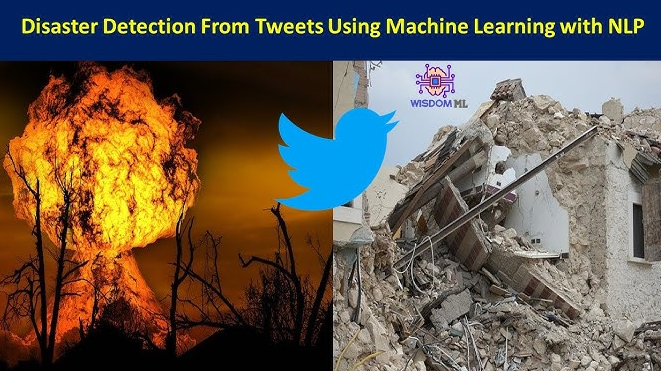

**1. Loading necessary libraries**

In [ ]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**2. Loading dataset**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/PROJECTS/Project-NLP/tweets.csv')
df

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


**3. Text preprocessing**

In [ ]:
text=df.iloc[:,-2]
text

,text
0,"Communal violence in Bhainsa, Telangana. ""Ston..."
1,Telangana: Section 144 has been imposed in Bha...
2,Arsonist sets cars ablaze at dealership https:...
3,Arsonist sets cars ablaze at dealership https:...
4,"""Lord Jesus, your love brings freedom and pard..."
...,...
11365,Media should have warned us well in advance. T...
11366,i feel directly attacked 💀 i consider moonbin ...
11367,i feel directly attacked 💀 i consider moonbin ...
11368,"ok who remember ""outcast"" nd the ""dora"" au?? T..."


In [ ]:
y=df['target']
y

,target
0,1
1,1
2,1
3,1
4,0
...,...
11365,0
11366,0
11367,0
11368,0


In [ ]:
text=text.str.replace('[^a-zA-Z0-9 ]','',regex=True)
text

,text
0,Communal violence in Bhainsa Telangana Stones ...
1,Telangana Section 144 has been imposed in Bhai...
2,Arsonist sets cars ablaze at dealership httpst...
3,Arsonist sets cars ablaze at dealership httpst...
4,Lord Jesus your love brings freedom and pardon...
...,...
11365,Media should have warned us well in advance Th...
11366,i feel directly attacked i consider moonbin a...
11367,i feel directly attacked i consider moonbin a...
11368,ok who remember outcast nd the dora au THOSE A...


In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
lemma=WordNetLemmatizer()
text = text.apply(lambda x: [lemma.lemmatize(word.lower(),pos='v') for word in nltk.word_tokenize(x)]).apply(lambda y: ' '.join(y))
text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,text
0,communal violence in bhainsa telangana stone b...
1,telangana section 144 have be impose in bhains...
2,arsonist set cars ablaze at dealership httpstc...
3,arsonist set cars ablaze at dealership httpstc...
4,lord jesus your love bring freedom and pardon ...
...,...
11365,media should have warn us well in advance this...
11366,i feel directly attack i consider moonbin amp ...
11367,i feel directly attack i consider moonbin amp ...
11368,ok who remember outcast nd the dora au those a...


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
sw=stopwords.words('english')
text=text.apply(lambda x:[w for w in nltk.word_tokenize(x) if w not in sw]).apply(lambda y:' '.join(y))
text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,text
0,communal violence bhainsa telangana stone pelt...
1,telangana section 144 impose bhainsa january 1...
2,arsonist set cars ablaze dealership httpstcogo...
3,arsonist set cars ablaze dealership httpstco0g...
4,lord jesus love bring freedom pardon fill holy...
...,...
11365,media warn us well advance wreck whole night r...
11366,feel directly attack consider moonbin amp jinj...
11367,feel directly attack consider moonbin amp jinj...
11368,ok remember outcast nd dora au au wreck nerve ...


In [ ]:
text=text.apply(lambda x:' '.join([w for w in nltk.word_tokenize(x) if len(w)>=3]))
text

,text
0,communal violence bhainsa telangana stone pelt...
1,telangana section 144 impose bhainsa january c...
2,arsonist set cars ablaze dealership httpstcogo...
3,arsonist set cars ablaze dealership httpstco0g...
4,lord jesus love bring freedom pardon fill holy...
...,...
11365,media warn well advance wreck whole night refu...
11366,feel directly attack consider moonbin amp jinj...
11367,feel directly attack consider moonbin amp jinj...
11368,remember outcast dora wreck nerve braincells j...


**4. Vectorization**

In [ ]:
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(text)
x=X.toarray()

**5. Handling class imbalance**

In [ ]:
y.value_counts()

,count
target,
0,9256
1,2114


In [ ]:
os=SMOTE(random_state=1)
x,y=os.fit_resample(x,y)
y.value_counts()

,count
target,
1,9256
0,9256


**6. Splitting data for training and testing**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)

**7. Model Building**

In [ ]:
knn=KNeighborsClassifier()
xgb=XGBClassifier()
rf=RandomForestClassifier(n_estimators=5)
ab=AdaBoostClassifier(n_estimators=5)
dec=DecisionTreeClassifier(max_depth=7)
nb=BernoulliNB()

In [ ]:
models=[knn,xgb,rf,ab,dec,nb]
for model in models:
  print(model)
  model.fit(X_train,y_train)
  y_new=model.predict(vectorizer.transform(['jake corway wreck run 14th irp']).toarray())
  print(y_new)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))

KNeighborsClassifier()
[1]
              precision    recall  f1-score   support

           0       0.98      0.31      0.47      2843
           1       0.58      0.99      0.73      2711

    accuracy                           0.64      5554
   macro avg       0.78      0.65      0.60      5554
weighted avg       0.78      0.64      0.60      5554

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              mul

**8. Choosing best model**

In [ ]:
import pickle
pickle.dump(nb,open('model_nlp.sav','wb'))
pickle.dump(vectorizer,open('vector_nlp.sav','wb'))

In [ ]:
import nltk
print(nltk.__version__)


3.8.1
